<a href="https://colab.research.google.com/github/CarlosEstellita/Image-Processing-First-Steps/blob/main/Medical%20Images%20-%20Thresholding/B%C3%A1sidoDoB%C3%A1sico_Threshold_pt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Básico do Básico - Segmentação de imagens com limiarização (pt. 4)

##Importando as bibliotecas

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #para plotar as imagens
import matplotlib.image as mpimg #para importar as imagens
import skimage.io #também para plotar imagens
import numpy as np #para trabalhar com as imagens
import sys
from matplotlib import rcParams #mudar os parâmetros das imagens
from skimage.filters import threshold_otsu #função que faz limiarização
from skimage.color import rgb2gray #função que converte imagens em RGB para escala de cinzas
from skimage import exposure #exposição
from skimage.exposure import histogram #função de fazer histogramas do skimage
from skimage.transform import rescale #reescalar o histograma

##Limiarização comum

###Importando e plotando as imagens

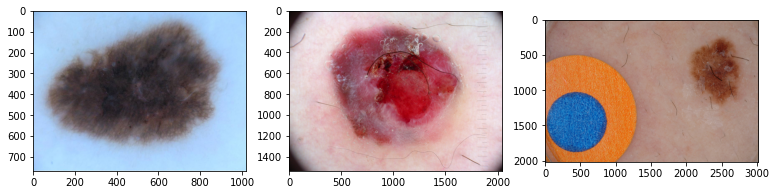

In [2]:
img1 = mpimg.imread('ISIC_0000000.jpg')
img2 = mpimg.imread('ISIC_0000146.jpg')
img3 = mpimg.imread('ISIC_0000999.jpg')

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(1, 3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

###Convertendo em escalas de cinza, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu

In [3]:
#Primeira imagem
img1_gray = rgb2gray(img1)
thresh1_img1 = threshold_otsu(img1_gray)
binary1_img1 = img1_gray > thresh1_img1
print("Benígno: ", threshold_otsu(img1_gray))

#Segunda imagem
img2_gray = rgb2gray(img2)
thresh2_img2 = threshold_otsu(img2_gray)
binary2_img2 = img2_gray > thresh2_img2
print("Benígno: ", threshold_otsu(img2_gray))

#Terceira imagem
img3_gray = rgb2gray(img3)
thresh3_img3 = threshold_otsu(img3_gray)
binary3_img3 = img3_gray > thresh3_img3
print("Benígno: ", threshold_otsu(img3_gray))

Benígno:  0.523509276194853
Benígno:  0.5589423445159314
Benígno:  0.4479915134803921


###Plotando a versão binarizada e em escala de cinzas das imagens

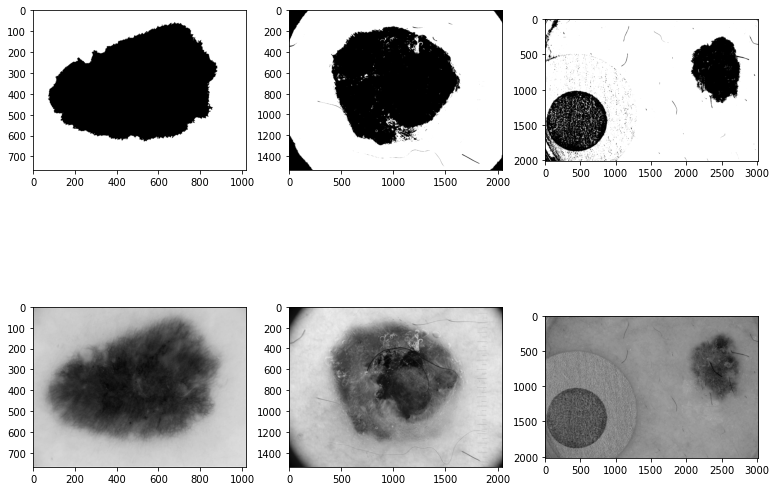

In [4]:
fig, ax = plt.subplots(2, 3)

ax[0,0].imshow(binary1_img1, cmap='gray')
ax[0,1].imshow(binary2_img2, cmap='gray')
ax[0,2].imshow(binary3_img3, cmap='gray')
ax[1,0].imshow(img1_gray, cmap='gray')
ax[1,1].imshow(img2_gray, cmap='gray')
ax[1,2].imshow(img3_gray, cmap='gray')

###Plotando os histogramas das escalas de cinzas

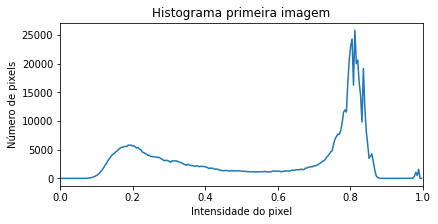

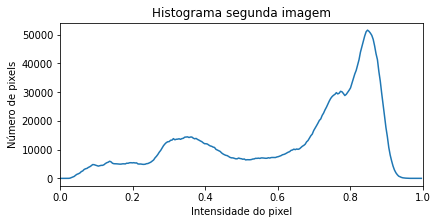

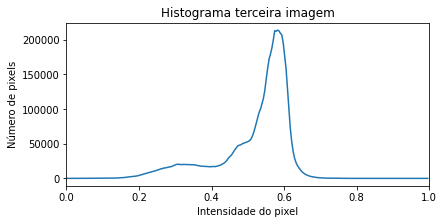

In [5]:
rcParams['figure.figsize'] = 6.5, 3

#Histograma primeira imagem
histogram1, bin_edges = np.histogram(img1_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma primeira imagem")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram1)

#Histograma segunda imagem
histogram2, bin_edges = np.histogram(img2_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma segunda imagem")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram2)

#Histograma terceira imagem
histogram3, bin_edges = np.histogram(img3_gray, bins=256, range=(0, 1))
plt.figure()
plt.title("Histograma terceira imagem")
plt.xlabel("Intensidade do pixel")
plt.ylabel("Número de pixels")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram3)

##Limiarização com equalização

###Equalizando as imagens e em seguida plotando as normais e equalizadas

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


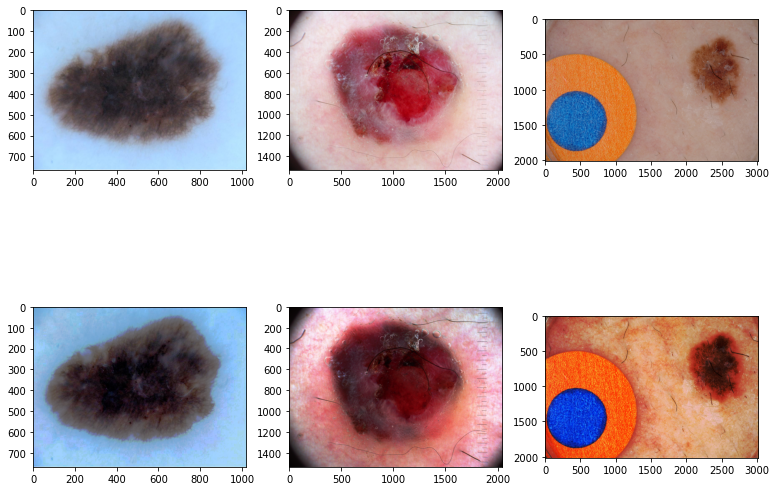

In [6]:
img1_equalized = exposure.equalize_hist(img1)
img2_equalized = exposure.equalize_hist(img2)
img3_equalized = exposure.equalize_hist(img3)

rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(img1)
ax[1,0].imshow(img1_equalized)
ax[0,1].imshow(img2)
ax[1,1].imshow(img2_equalized)
ax[0,2].imshow(img3)
ax[1,2].imshow(img3_equalized)

###Convertendo em escalas de cinzas, definindo o novo limiar das imagens e retornando o valor do limiar de Otsu

In [7]:
#Convertendo a primeira imagem
img1_equalized_gray = rgb2gray(img1_equalized)
thresh4_img1 = threshold_otsu(img1_equalized_gray)
binary4_img1 = img1_equalized_gray > thresh4_img1
print("Primeira: ", threshold_otsu(img1_equalized_gray))

#Convertendo a segunda imagem
img2_equalized_gray = rgb2gray(img2_equalized)
thresh5_img2 = threshold_otsu(img2_equalized_gray)
binary5_img2 = img2_equalized_gray > thresh5_img2
print("Segunda: ", threshold_otsu(img2_equalized_gray))

#Convertendo a terceira imagem
img3_equalized_gray = rgb2gray(img3_equalized)
thresh6_img3 = threshold_otsu(img3_equalized_gray)
binary6_img3 = img3_equalized_gray > thresh6_img3
print("Terceira: ", threshold_otsu(img3_equalized_gray))


Primeira:  0.45508854909388735
Segunda:  0.43631540696751336
Terceira:  0.45201454280046893


###Plotando a limiarização normal e equalizada

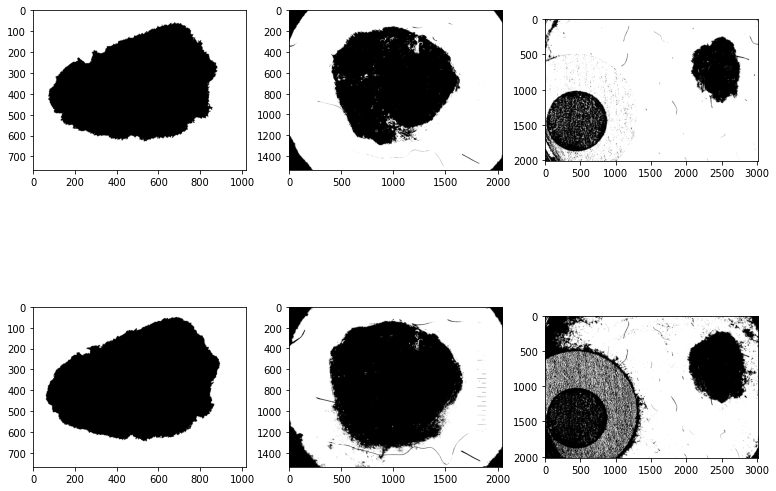

In [9]:
rcParams['figure.figsize'] = 13, 10

fig, ax = plt.subplots(2, 3)
ax[0,0].imshow(binary1_img1, cmap='gray')
ax[1,0].imshow(binary4_img1, cmap='gray')
ax[0,1].imshow(binary2_img2, cmap='gray')
ax[1,1].imshow(binary5_img2, cmap='gray')
ax[0,2].imshow(binary3_img3, cmap='gray')
ax[1,2].imshow(binary6_img3, cmap='gray')